# API (Application Programming Interface)

API는 서로 다른 애플리케이션(프로그램) 간에 데이터를 주고받을 수 있는 창구입니다.

현대 사회에서 우리가 사용하는 많은 서비스들은 다양한 애플리케이션으로 구성되어 있습니다.

예를 들어, 음악 스트리밍 서비스를 이용한다면, 서비스는 당신의 플레이리스트와 재생 정보를 저장하는 애플리케이션과 음악 데이터를 제공하는 애플리케이션으로 구성되어 있을 것입니다.

이때, 두 애플리케이션 간에 데이터를 주고 받기 위해서는, 서로가 이해할 수 있는 형태로 데이터를 전달해야 합니다. 이를 위해 API는 필수적인 요소입니다.

API는 마치 서로 다른 언어를 사용하는 사람들이 의사소통할 때 필요한 번역기와 같습니다. 각각의 애플리케이션이 사용하는 데이터와 문법을 API가 이해하고, 다른 애플리케이션으로 전달할 수 있는 형태로 변환해주는 것입니다.

API를 사용하면, 여러 애플리케이션 간의 데이터 전송이 더욱 효율적이고 원활하게 이루어질 수 있습니다. 이를 통해 우리는 더 많은 기능과 서비스를 사용할 수 있습니다.


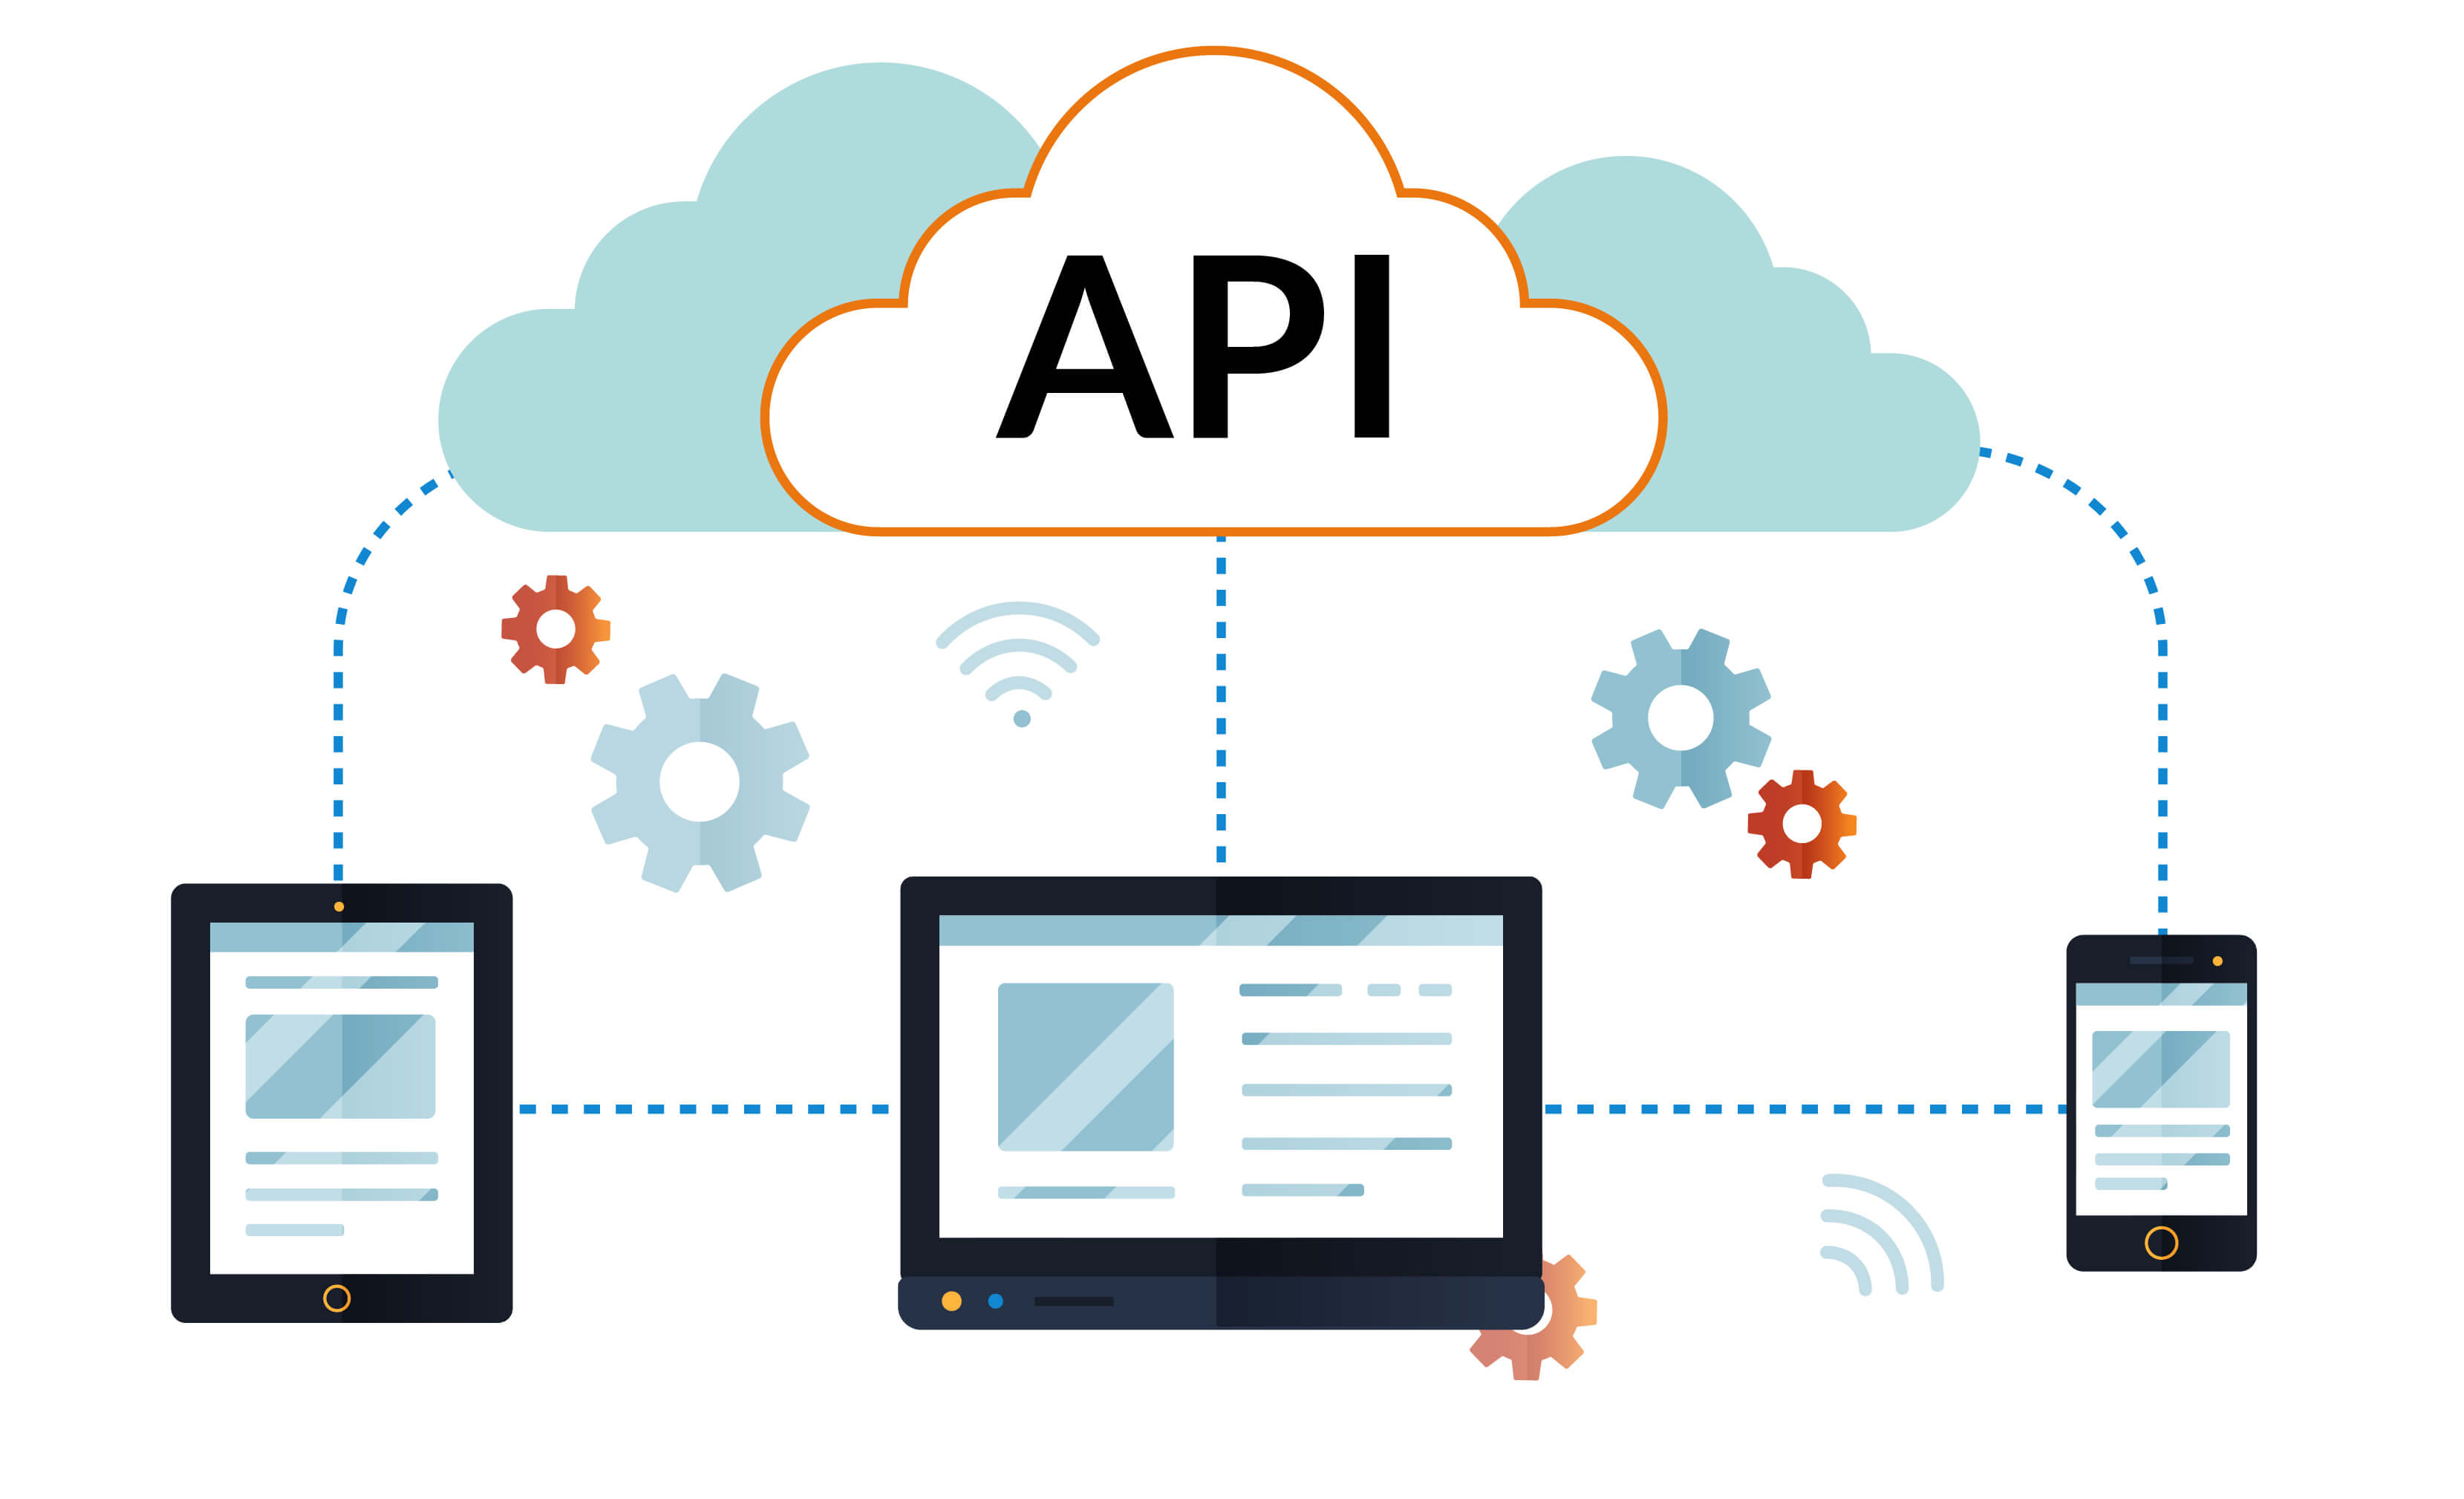





https://cs-fundamentals.blogspot.com/2020/06/basic-api-development-part-1-importance.html

## OpenWeatherMap 날씨정보

[API 발급 및 활용방법]
* https://openweathermap.org/api 사이트에서 Current Weather data에 대한 API doc 내용을 파악
* 개발자 등록을 하고 API 키 발급 받음(https://home.openweathermap.org/users/sign_up)
* New Account 등록 후 API Keys라는 탭에서 API Key 확인 가능
* 기본적으로 유료 사이트이지만 현재 날씨, 5일까지의 날씨는 무료로 사용할 수 있음(단 1분에 60번만 호출 가능)

[수집 데이터]
* 서울, 토쿄, 뉴욕의 날씨를 가져오는 프로그램 작성(text로 가져와서 json으로 변환하여 일차 출력)
  - cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
  - 가져올 정보 : 도시별 날씨(description), 최저 기온(temp_min), 최고 기온(temp_max), 습도(humidity), 기압(pressure), 풍속(speed)
  - 기온 데이터는 켈빈 온도로 되어 있으며 섭씨 온도로 변환해서 출력
* json 포멧으로 출력 데이터를 아래와 같이 가독력 있게 출력(소수점 2번째에서 반올림 처리)


[출력형식]

    도시 = Seoul
    | 날씨 = broken clouds
    | 최저 기온 = -1.0 2
    | 최고 기온 = 2.0 2
    | 습도 = 74
    | 기압 = 1023
    | 풍속 = 0.5

### 예시 1

In [15]:
import json
import requests as rq
apikey = "dace8640b2279c6914a50940b60e837a"
api = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={key}'
url = api.format(key=apikey)
res = rq.get(url)
data = json.loads(res.text)
print(data)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1683018000, 'main': {'temp': 283.47, 'feels_like': 281.58, 'temp_min': 283.47, 'temp_max': 285.72, 'pressure': 1025, 'sea_level': 1025, 'grnd_level': 1007, 'humidity': 39, 'temp_kf': -2.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 3}, 'wind': {'speed': 2.55, 'deg': 259, 'gust': 3.76}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-05-02 09:00:00'}, {'dt': 1683028800, 'main': {'temp': 285.92, 'feels_like': 284.14, 'temp_min': 285.92, 'temp_max': 287.7, 'pressure': 1024, 'sea_level': 1024, 'grnd_level': 1006, 'humidity': 34, 'temp_kf': -1.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 24}, 'wind': {'speed': 3.27, 'deg': 233, 'gust': 4.12}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-05-02 12:00:00'}, {'dt': 1683039600, 'main': {'temp': 287.37, 'feels_like': 285.7

In [3]:
import json
import requests as rq
apikey = "dace8640b2279c6914a50940b60e837a"
cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
api = "http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={key}"
# api = "api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}"
k2c = lambda k: k - 273.15
for name in cities:
    url = api.format(city=name, key=apikey)
    res = rq.get(url)
    data = json.loads(res.text)
    print(data)

{'coord': {'lon': 126.9778, 'lat': 37.5683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.04, 'feels_like': 296.01, 'temp_min': 294.84, 'temp_max': 297.81, 'pressure': 1022, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 210, 'gust': 9.77}, 'clouds': {'all': 0}, 'dt': 1683009212, 'sys': {'type': 1, 'id': 8105, 'country': 'KR', 'sunrise': 1682973386, 'sunset': 1683022902}, 'timezone': 32400, 'id': 1835848, 'name': 'Seoul', 'cod': 200}
{'coord': {'lon': 139.6917, 'lat': 35.6895}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.6, 'feels_like': 294.53, 'temp_min': 294.63, 'temp_max': 296.37, 'pressure': 1019, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1683009303, 'sys': {'type': 2, 'id': 2001249, 'country': 'JP', 'sunrise': 1682970538, 'sunset': 1

In [4]:
import json
import requests as rq
import numpy as np
apikey = "dace8640b2279c6914a50940b60e837a"
cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
api = "http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={key}"
k2c = lambda k: k - 273.15
for name in cities:
    url = api.format(city=name, key=apikey)
    res = rq.get(url)
    data = json.loads(res.text)

    print("+ 도시 =", data["name"])
    print("| 날씨 =", data["weather"][0]["description"])
    print("| 최저 기온 =", np.round(k2c(data["main"]["temp_min"])), 2)
    print("| 최고 기온 =", np.round(k2c(data["main"]["temp_max"])), 2)
    print("| 습도 =", data["main"]["humidity"])
    print("| 기압 =", data["main"]["pressure"])
    print("| 풍속 =", data["wind"]["speed"])
    print("")

+ 도시 = Seoul
| 날씨 = clear sky
| 최저 기온 = 22.0 2
| 최고 기온 = 25.0 2
| 습도 = 20
| 기압 = 1022
| 풍속 = 4.12

+ 도시 = Tokyo
| 날씨 = few clouds
| 최저 기온 = 21.0 2
| 최고 기온 = 23.0 2
| 습도 = 24
| 기압 = 1019
| 풍속 = 8.75

+ 도시 = New York
| 날씨 = scattered clouds
| 최저 기온 = 8.0 2
| 최고 기온 = 12.0 2
| 습도 = 67
| 기압 = 995
| 풍속 = 4.02



### 예시 2


매개변수 딕셔너리 활용 (언어, api key, 도시이름, 결과값 단위)


In [5]:
import requests
import json

key= "dace8640b2279c6914a50940b60e837a"
cities = ['Seoul','Tokyo','New York']

url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {'lang' : 'kr' , 'appid' : key,'q':'Tokyo' }
response = requests.get(url, params=params)
response.text

'{"coord":{"lon":139.6917,"lat":35.6895},"weather":[{"id":801,"main":"Clouds","description":"약간의 구름이 낀 하늘","icon":"02d"}],"base":"stations","main":{"temp":295.6,"feels_like":294.53,"temp_min":294.63,"temp_max":296.37,"pressure":1019,"humidity":24},"visibility":10000,"wind":{"speed":8.75,"deg":340},"clouds":{"all":20},"dt":1683009303,"sys":{"type":2,"id":2001249,"country":"JP","sunrise":1682970538,"sunset":1683019648},"timezone":32400,"id":1850144,"name":"Tokyo","cod":200}'

In [19]:
# OpenWeatherMap API에서 제공하는 날씨 정보를 가져오는 예제 코드
# cities 변수에는 날씨 정보를 가져올 도시들의 이름을 리스트로 저장
import requests
import json

key= 'cdf3410b0e1f5964a99c79cf488ef400'
cities = ['Seoul','Tokyo','New York']

# cities 리스트에 있는 도시들의 날씨 정보를 반복문을 통해 가져오기
for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    params = {'lang' : 'kr' , 'appid' : key,'q':city,'units':'metric' }
    response = requests.get(url, params=params).text
    data = json.loads(response)
    print("+ 도시 =", data["name"]) # 도시 이름을 출력
    print("| 날씨 =", data["weather"][0]["description"]) # 날씨 상태를 출력
    print("| 최저 기온 =", data["main"]["temp_min"]) # 최저 기온을 출력
    print("| 최고 기온 =", data["main"]["temp_max"]) # 최고 기온을 출력
    print("| 습도 =", data["main"]["humidity"]) # 습도를 출력
    print("| 기압 =", data["main"]["pressure"]) # 기압을 출력
    print("| 풍향 =", data["wind"]["deg"]) # 풍향을 출력
    print("| 풍속 =", data["wind"]["speed"]) # 풍속을 출력
    print("")


+ 도시 = Seoul
| 날씨 = 맑음
| 최저 기온 = 21.69
| 최고 기온 = 23.78
| 습도 = 20
| 기압 = 1022
| 풍향 = 210
| 풍속 = 4.12

+ 도시 = Tokyo
| 날씨 = 약간의 구름이 낀 하늘
| 최저 기온 = 20.33
| 최고 기온 = 23.78
| 습도 = 25
| 기압 = 1019
| 풍향 = 350
| 풍속 = 8.75

+ 도시 = New York
| 날씨 = 온흐림
| 최저 기온 = 7.31
| 최고 기온 = 11.65
| 습도 = 68
| 기압 = 995
| 풍향 = 220
| 풍속 = 4.12



## 공공데이터 포털

In [24]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

skey = 'WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D'
res_id = 'storezone'
stype ='json'
url = 'http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi'
params = f'?ServiceKey={skey}&type={stype}&resId={res_id}&' + urlencode({quote_plus('key'):'9244'})
query = url + params
print(query)

request = Request(query)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
items = response_dict['body']['items']

df = pd.DataFrame(items)
df



http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi?ServiceKey=WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D&type=json&resId=storezone&key=9244
b'{\n\t"header" : {\n\t\t"description" : "\xec\x86\x8c\xec\x83\x81\xea\xb3\xb5\xec\x9d\xb8\xec\x8b\x9c\xec\x9e\xa5\xec\xa7\x84\xed\x9d\xa5\xea\xb3\xb5\xeb\x8b\xa8 \xec\xa3\xbc\xec\x9a\x94\xec\x83\x81\xea\xb6\x8c"\n\t\t,"columns" : ["\xec\x83\x81\xea\xb6\x8c\xeb\xb2\x88\xed\x98\xb8","\xec\x83\x81\xea\xb6\x8c\xeb\xaa\x85","\xec\x8b\x9c\xeb\x8f\x84\xec\xbd\x94\xeb\x93\x9c","\xec\x8b\x9c\xeb\x8f\x84\xeb\xaa\x85","\xec\x8b\x9c\xea\xb5\xb0\xea\xb5\xac\xec\xbd\x94\xeb\x93\x9c","\xec\x8b\x9c\xea\xb5\xb0\xea\xb5\xac\xeb\xaa\x85","\xec\x83\x81\xea\xb6\x8c\xeb\xa9\xb4\xec\xa0\x81","\xec\xa2\x8c\xed\x91\x9c\xea\xb0\x9c\xec\x88\x98","\xec\xa2\x8c\xed\x91\x9c\xea\xb0\x92","\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xea\xb8\xb0\xec\xa4\x80\xec\x9d\xbc\xec\x9e\x90"]\n\t\t,"resultCode" : "00"\n\t\t,"resultMsg" 

,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,9244,영등포역_1,11,서울특별시,11560,영등포구,81469,21,MULTIPOLYGON (((126.905891890858 37.5155742321...,2021-06-30


In [8]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

def baro_api(skey, res_id, encode):

    stype ='json'
    url = 'http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi'
    params = f'?ServiceKey={skey}&type={stype}&resId={res_id}&' + encode
    query = url + params
#     print(query)

    request = Request(query)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
#     print(response_body)

    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['body']['items']

    df = pd.DataFrame(items)
    return df

### 예시 1 - 상권조회

#### 지정 상권조회

In [20]:
skey = 'WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D'
res_id = 'storezone'
encode = urlencode({quote_plus('key'):'9193'})
# encode = urlencode({quote_plus('key'):'9140'})
# encode = urlencode({quote_plus('key'):'9143'})
baro_api(skey, res_id, encode)

,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,9193,동대문역사문화공원역,11,서울특별시,11140,중구,79167,17,MULTIPOLYGON (((127.00304244009 37.56673071604...,2021-06-30


#### 반경내 상권조회

In [21]:
encode = urlencode({quote_plus('catId'):'radius', quote_plus('radius'):'500', 
                    quote_plus('cx'):'127.004528',quote_plus('cy'):'37.567538'})
baro_api(skey, res_id, encode)

""


#### 사각형내 상권조회

In [22]:
encode = urlencode({quote_plus('catId'):'rectangle', quote_plus('minx'):'126.978020', 
                    quote_plus('miny'):'37.557825', quote_plus('maxx'):'126.987732', quote_plus('maxy'):'37.562022'})
baro_api(skey, res_id, encode)

""


#### 행정단위 상권조회

In [12]:
encode = urlencode({quote_plus('catId'):'dong', quote_plus('divId'):'adongCd', quote_plus('key'):'1168069000'})
baro_api(skey, res_id, encode)

,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,9324,포이사거리,11,서울특별시,11680,강남구,14033,33,MULTIPOLYGON (((127.044811833677 37.4781705036...,2021-06-30


### 예시 2 - 상가업소 조회

#### 행정동 단위 상가업소 조회

In [14]:
res_id = 'store'
    
encode = urlencode({quote_plus('catId'):'dong', quote_plus('divId'):'ctprvnCd', quote_plus('key'):'11'})
baro_api(skey, res_id, encode)

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,bldMngNo,bldNm,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat
0,MA010120220700000340,온가족정신건강의학과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1171010700104790000006368,헬리오시티,서울특별시 송파구 송파대로 345,138161,05698,,,,127.102519,37.497606
1,MA010120220700001496,가양성모내과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1150010200106280006027141,,서울특별시 강서구 화곡로68길 3,157838,07548,,,,126.854715,37.559572
2,MA010120220700001621,남플란트치과의원,,Q1,보건의료,Q102,의원,Q10210,치과의원,Q86202,...,1147010100111830005003622,,서울특별시 양천구 중앙로 265,158864,08073,,3,,126.852686,37.519916
3,MA010120220700001703,편안한재활의학과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1138010600100120032025832,상일빌딩,서울특별시 은평구 통일로67길 3,122837,03396,,4,,126.928817,37.610915
4,MA010120220700002183,기쁨내과,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1174010800104400000004039,대성빌딩,서울특별시 강동구 양재대로 1319,134846,05408,,6,,127.134421,37.524191
5,MA010120220700003416,삼성마음친구정신건강의학과,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1168011500107140000026893,로얄프라자,서울특별시 강남구 광평로51길 8,135884,06349,,2,,127.102471,37.488361
6,MA010120220700004115,성모탑정형외과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1144010400105440000003652,고려빌딩,서울특별시 마포구 큰우물로 76,121704,04167,,1,,126.945934,37.540860
7,MA010120220700004173,수미상회,,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,1168010800101450016008520,,서울특별시 강남구 학동로4길 35,135825,06114,,1,,127.023961,37.509174
8,MA010120220700004702,강남연세안과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1168010100107050029022378,선릉빌딩,서울특별시 강남구 테헤란로 339,135922,06150,,4,,127.048584,37.504807
9,MA010120220700008104,당신의정신건강의학과의원,,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,1165010800113280011027576,대우도씨에빛2,서울특별시 서초구 강남대로 359,137858,06621,,2,,127.028593,37.494786
